# Test on a RGB star

In [1]:
import lightkurve as lk
import warnings
warnings.filterwarnings('ignore')

In [2]:
datalist = lk.search_lightcurvefile('KIC11615890')
data = datalist.download_all()
lc = data[0].PDCSAP_FLUX.normalize().flatten()
for nlc in data[0:4]:
    lc = lc.append(nlc.PDCSAP_FLUX.normalize().flatten())
lc = lc.remove_nans()
pg = lc.to_periodogram(normalization='psd')
snr = pg.flatten()

Our value for numax is: 176.93 uHz


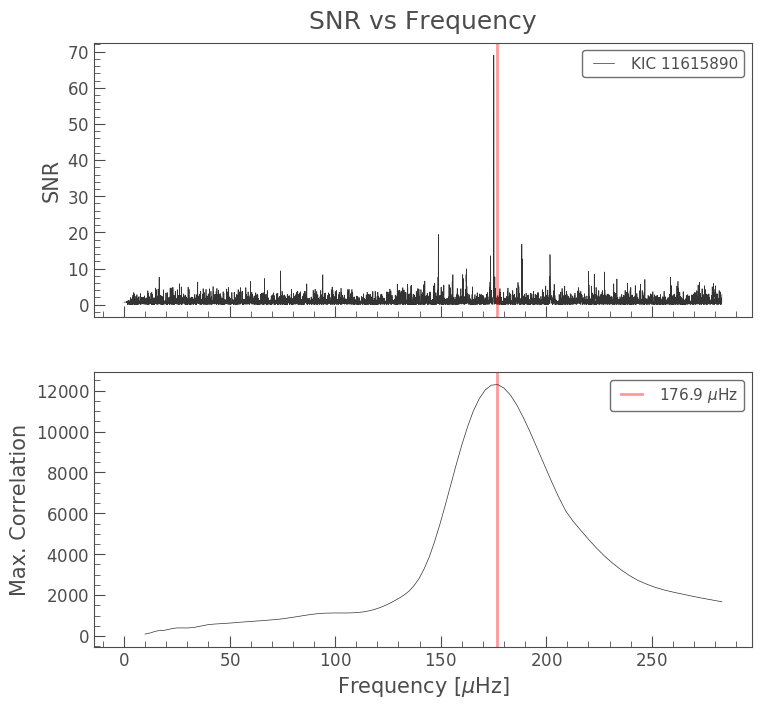

In [3]:
numax, ax = snr.estimate_numax(show_plots=True)
print('Our value for numax is: {:.2f}'.format(numax))

Our value for dnu is: 13.15 uHz


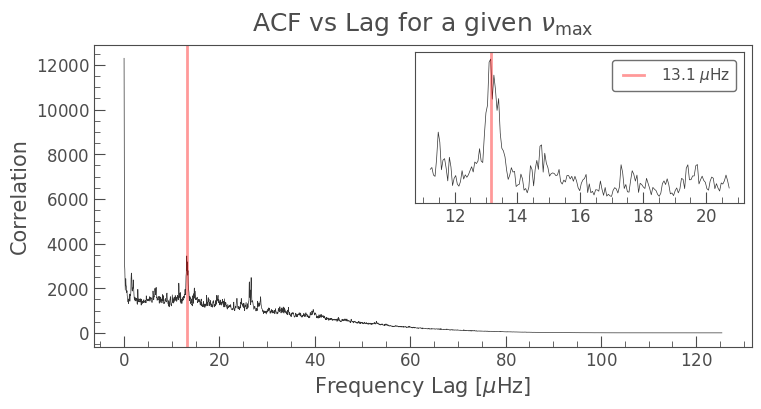

In [4]:
dnu, ax = snr.estimate_dnu(show_plots=True)
print('Our value for dnu is: {:.2f}'.format(dnu))

# Test on a MS Star

In [5]:
datalist = lk.search_lightcurvefile('16CygA',cadence='short')
data = datalist[3:4].download_all()
lc = data[0].PDCSAP_FLUX.normalize().flatten()
for nlc in data:
    lc = lc.append(nlc.PDCSAP_FLUX.normalize().flatten())
lc = lc.remove_nans()
pg = lc.to_periodogram(normalization='psd')
snr = pg.flatten()

Our value for numax is: 2190.08 uHz


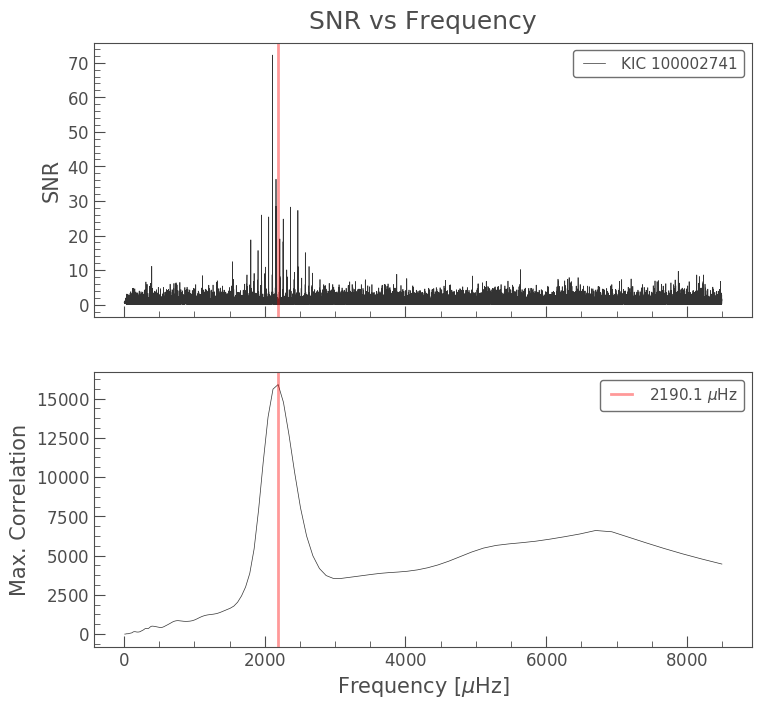

In [6]:
numax, ax = snr.estimate_numax(show_plots=True)
print('Our value for numax is: {:.2f}'.format(numax))

Our value for dnu is: 103.41 uHz


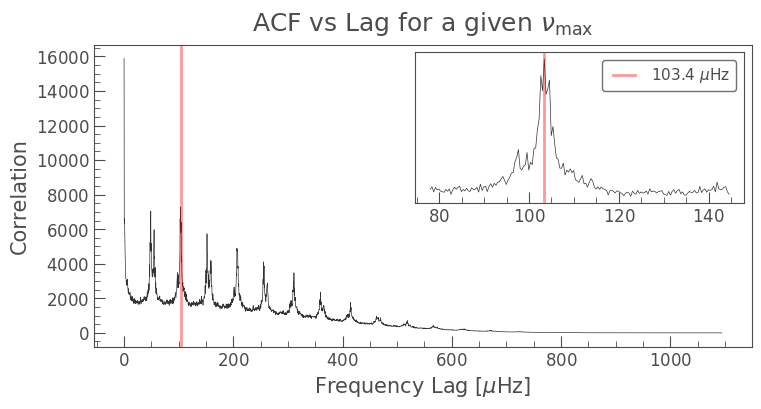

In [7]:
dnu, ax = snr.estimate_dnu(show_plots=True)
print('Our value for dnu is: {:.2f}'.format(dnu))

# Concept testing

In [8]:
import numpy as np
acf = snr._autocorrelate(numax.value)
dnu_emp = 0.294 * numax.value ** 0.772
fs = np.median(np.diff(snr.frequency.value))
lags = np.linspace(0, len(acf)*fs, len(acf))
sel = (lags > dnu_emp - .15*dnu_emp) & (lags < dnu_emp + .15*dnu_emp)
best_dnu = lags[sel][np.argmax(acf[sel])]


In [9]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


fig, ax = plt.subplots(figsize=(8.485, 4))
ax.plot(lags,acf)
ax.set_xlabel(r'Frequency Lag [$\mu$Hz]')
ax.set_ylabel(r'Correlation')
ax.axvline(best_dnu,c='r', linewidth=2,alpha=.4,
    label=r'{:.2f} $\mu$Hz'.format(best_dnu))
ax.set_title(r'ACF vs Lag for a given $\nu_{\rm max}$')

axin = inset_axes(ax, width="50%",height="50%", loc="upper right")
axin.set_yticks([])
axin.plot(lags[sel],acf[sel])
axin.axvline(best_dnu,c='r', linewidth=2,alpha=.4,
    label=r'{:.2f} $\mu$Hz'.format(best_dnu))
axin.legend(loc='best')



NameError: name 'plt' is not defined

In [ ]:
import pylab as plt
fig = plt.figure(figsize=(12,6))
dnuemp = 0.294 * numax.value**0.772
truth = 102.
dnu = lags[lags>20][np.argmax(acf[lags>20])]
plt.plot(lags, acf)
plt.axvline(truth, linestyle=':',linewidth=15)
plt.axvline(dnu, linestyle='--',linewidth=10, c='r')
plt.xlim(dnuemp-.15*dnuemp, dnuemp+.15*dnuemp)